# Package Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,lognorm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. <b>Understand the problem</b>. I'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. I'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. I'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. I'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. I'll check if the data meets the assumptions required by most multivariate techniques.

# Understand the problem

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
print(f"Quantitative Data:\n{quantitative}")

qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
print(f"Qualitative Data:\n{qualitative}")

Quantitative Data:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Qualitative Data:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Ga

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

*Quantitative*: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

*Qualitative*: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities, 

In [6]:
sum(df_train[qualitative + quantitative].duplicated())

0

There is no duplicate data in the training set

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


<AxesSubplot:>

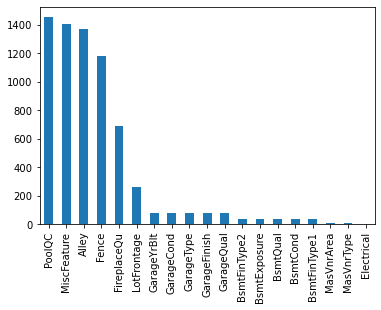

In [7]:
missing = df_train.isnull().sum().sort_values(ascending=False)
df_missing = pd.DataFrame({'Total': missing})
df_missing['Percentage'] = df_missing.Total/len(df_train)
df_missing = df_missing[df_missing.Total>0]
display(df_missing)
df_missing.Total.plot.bar()

19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

# Univariable study

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 The minimum sale price is larger than zero

In [9]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<AxesSubplot:title={'center':'Normal'}, xlabel='SalePrice', ylabel='Density'>

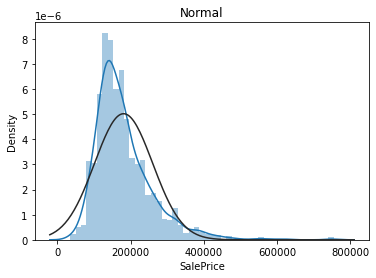

In [10]:
plt.title('Normal')
sns.distplot(df_train['SalePrice'],fit=norm)

Deviate from the normal distribution and have appreciable positive skewness

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice', ylabel='Density'>

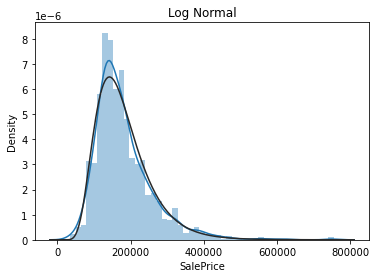

In [11]:
plt.title('Log Normal')
sns.distplot(df_train['SalePrice'],fit=lognorm)

# Multivariate study

## Quantitative Data

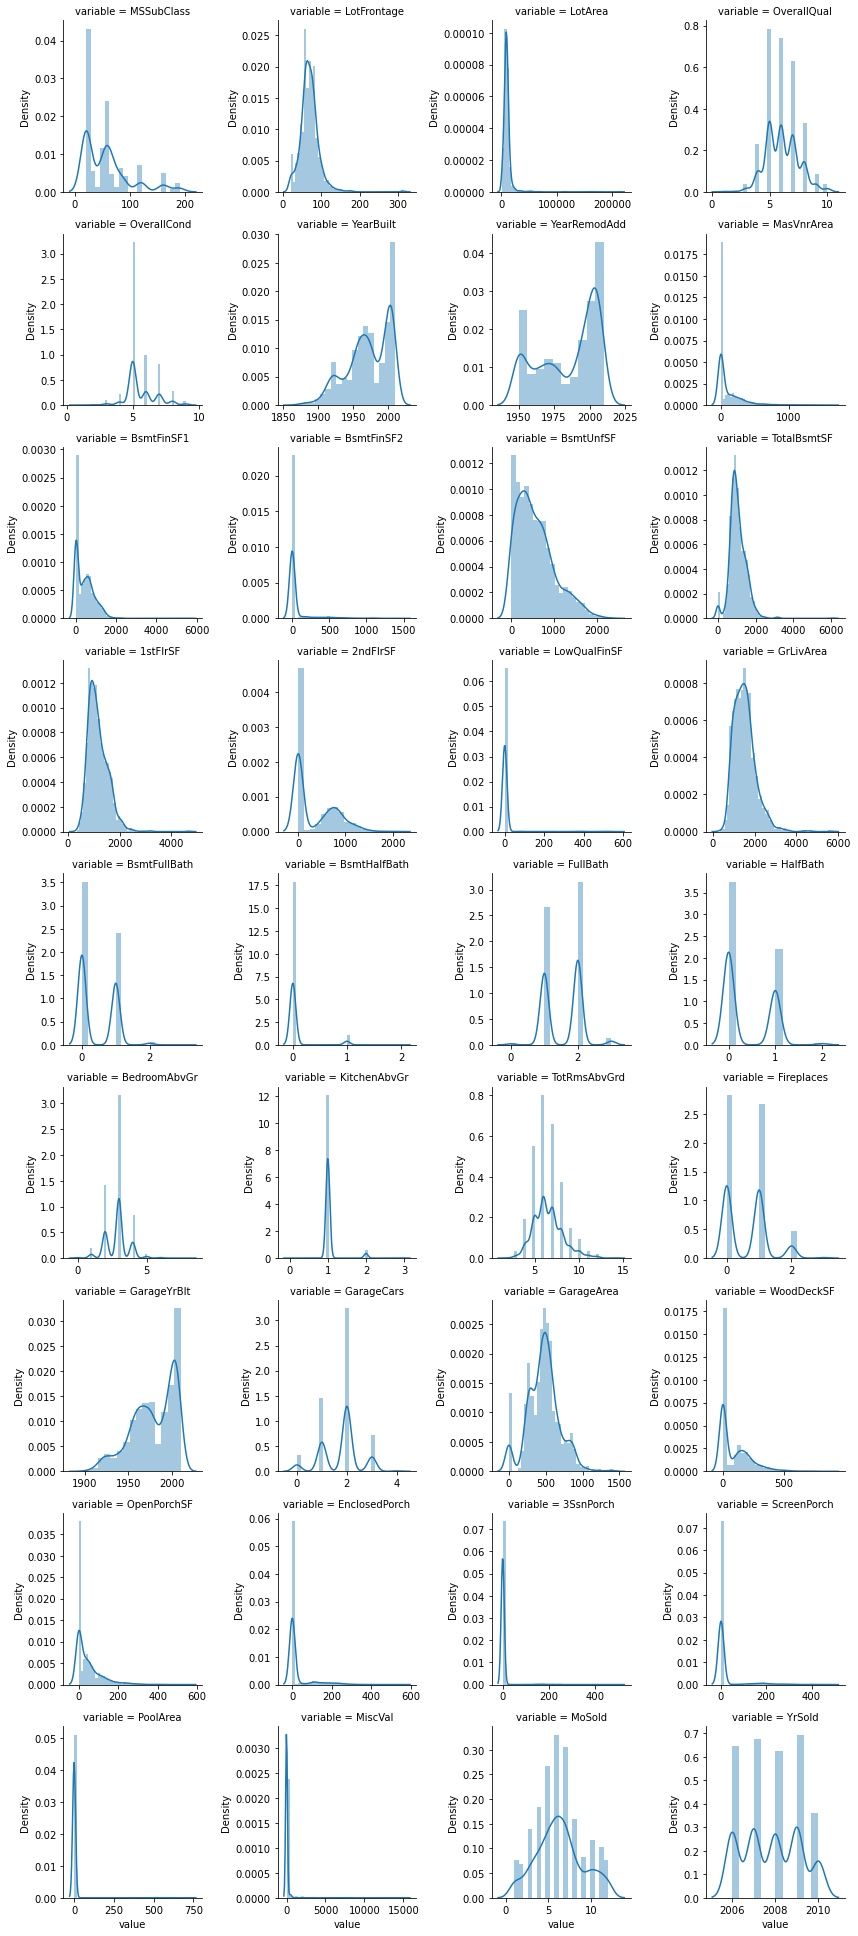

In [12]:
f = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.

## Categorical data

With qualitative variables we can implement two methods. First one is to check distribution of SalePrice with respect to variable values and enumerate them. Second to create dummy variable for each possible category.

In [13]:
for col in qualitative:
    df_train[col] = df_train[col].astype('category')
    if df_train[col].isnull().any():
        df_train[col] = df_train[col].cat.add_categories(['MISSING'])
        df_train[col] = df_train[col].fillna('MISSING')

In [14]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

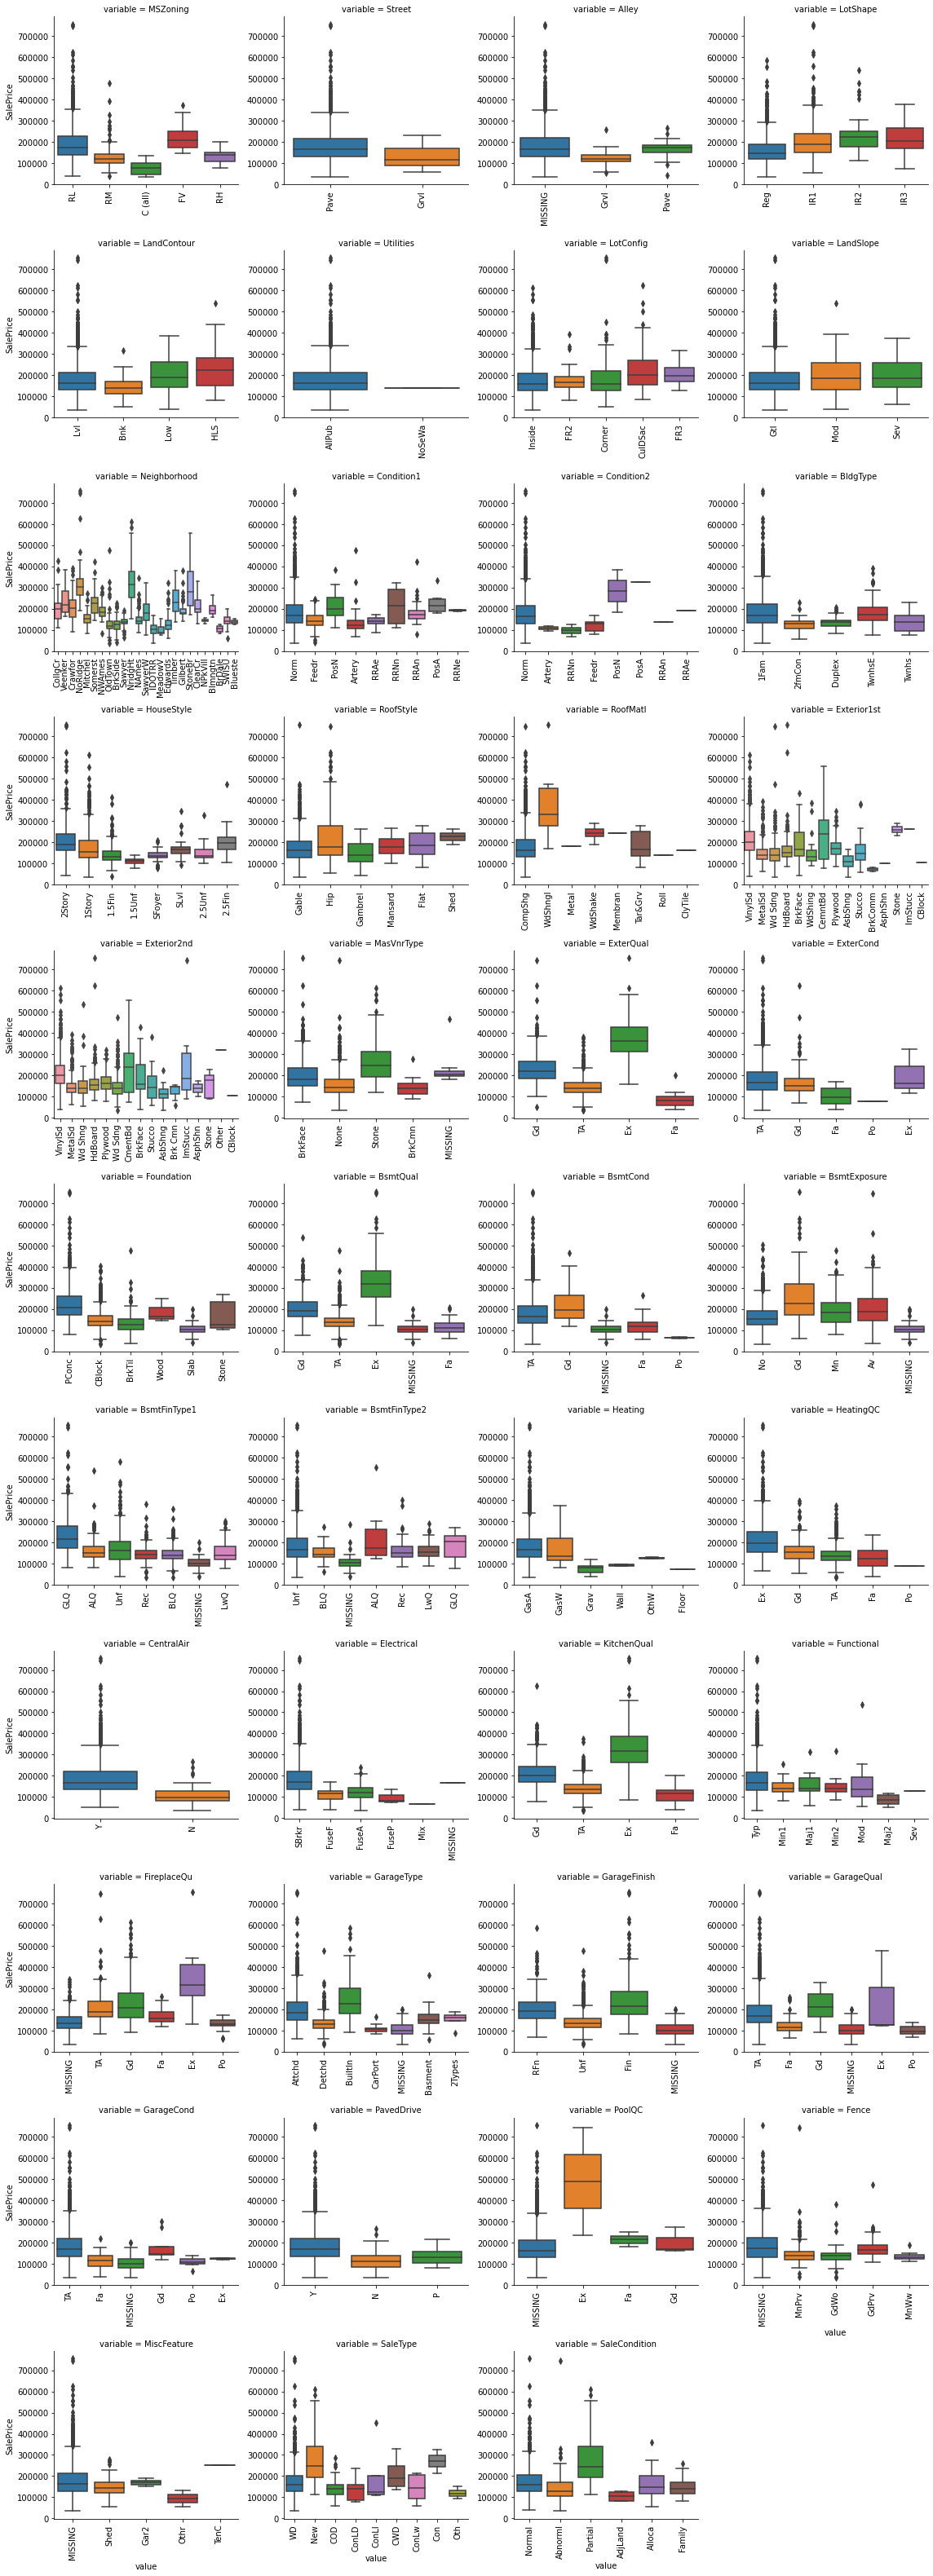

In [15]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False,size=4)
g = g.map(boxplot, "value", "SalePrice")

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

## Correlation

In [16]:
def rank_category(df, col):
    df_ = (df[[col, 'SalePrice']].copy()
            .groupby(col).mean()
            .sort_values('SalePrice')
            .reset_index()
            .reset_index()
            .rename(columns={'index':col+'_Order','SalePrice':col+'_SalePriceMean'}))
    return df_
    
qualitative_ranked = []
for col in qualitative:  
    df_ = rank_category(df_train, col)
    df_train = pd.merge(df_train,df_,left_on=col,right_on=col,how='inner')
    qualitative_ranked.append(col+'_Order')

<AxesSubplot:xlabel='SalePrice', ylabel='index'>

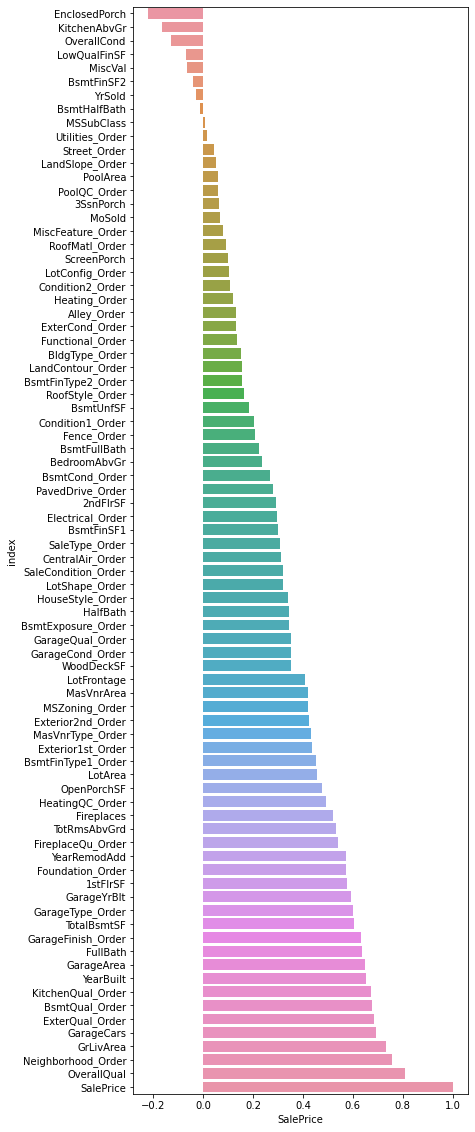

In [17]:
corr_all = (df_train[quantitative + qualitative_ranked + ['SalePrice']]
        .corr(method='spearman')
        .sort_values('SalePrice')
        .reset_index())
plt.figure(figsize=(6, len(corr_all)/4))
sns.barplot(data=corr_all, y='index', x='SalePrice')

1. The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

2. One more difference is that Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.

Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. OverallQual is main criterion in establishing house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

<AxesSubplot:>

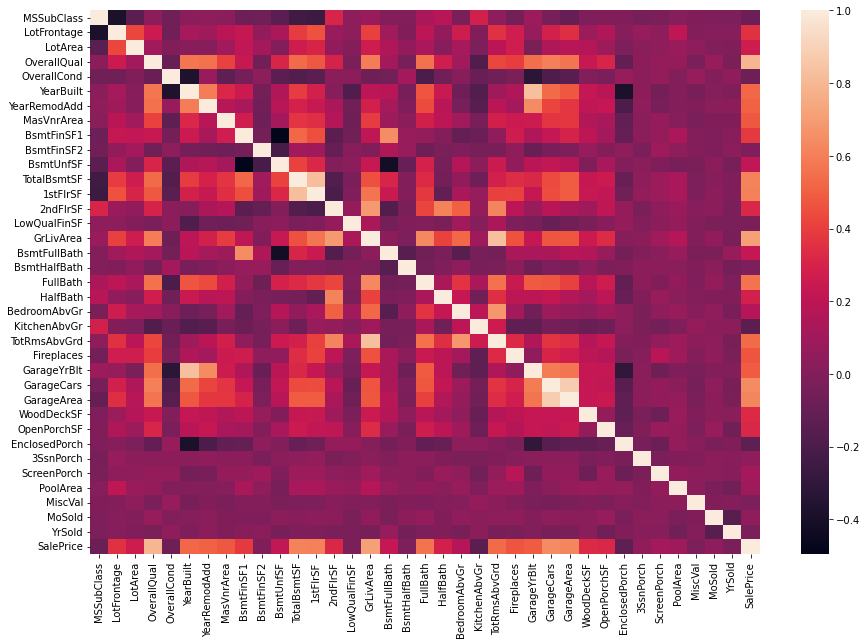

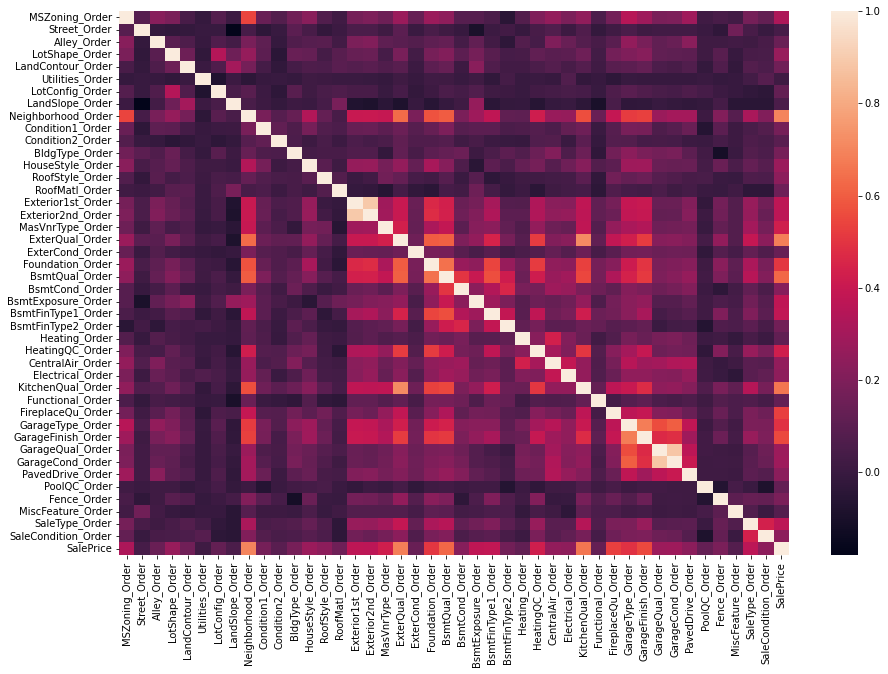

In [18]:
plt.figure(figsize=(15,10))
corr_ = df_train[quantitative+['SalePrice']].corr()
sns.heatmap(corr_)
plt.figure(figsize=(15,10))
corr_ = df_train[qualitative_ranked+['SalePrice']].corr()
sns.heatmap(corr_)

At first sight, there are two white colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

The well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are highly correlated with 'SalePrice', but we can also see many other variables that should be taken into account.

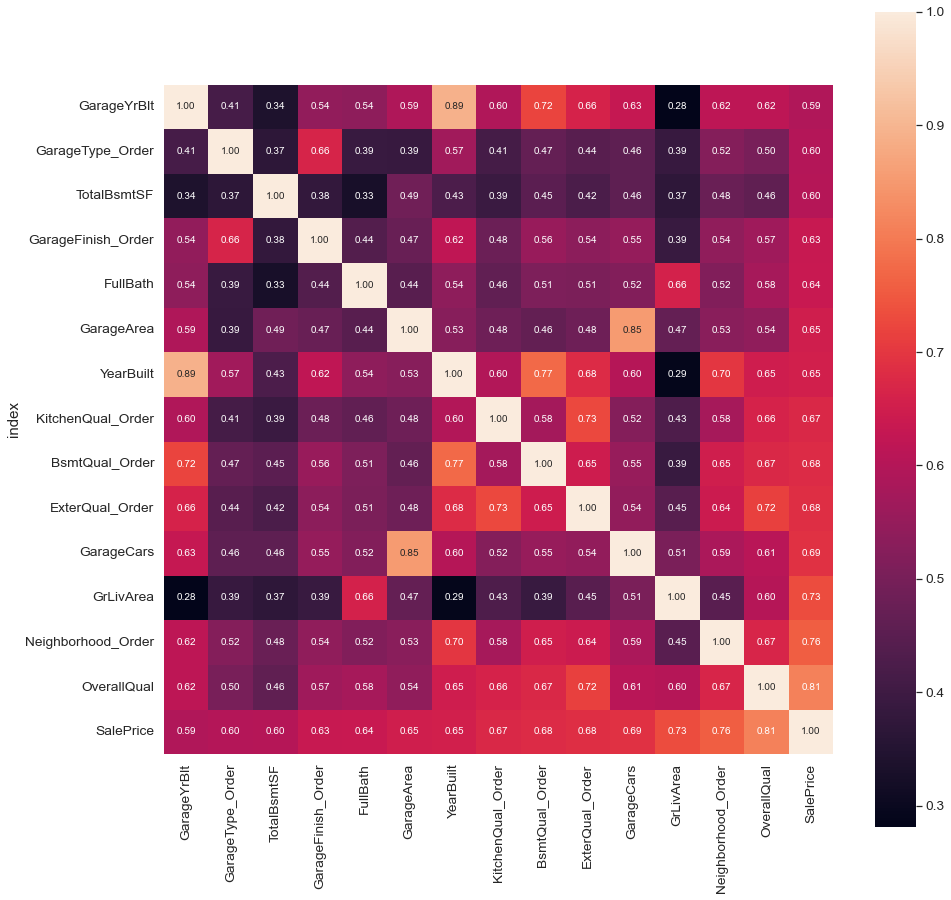

In [19]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corr_all.iloc[-k:]['index']
corr_ = corr_all.iloc[-k:][list(cols) + ['index']].copy().set_index('index')
plt.figure(figsize=(len(corr_), len(corr_)))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr_, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

 * 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. The number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
*  Years Built and Garage Yr Blt

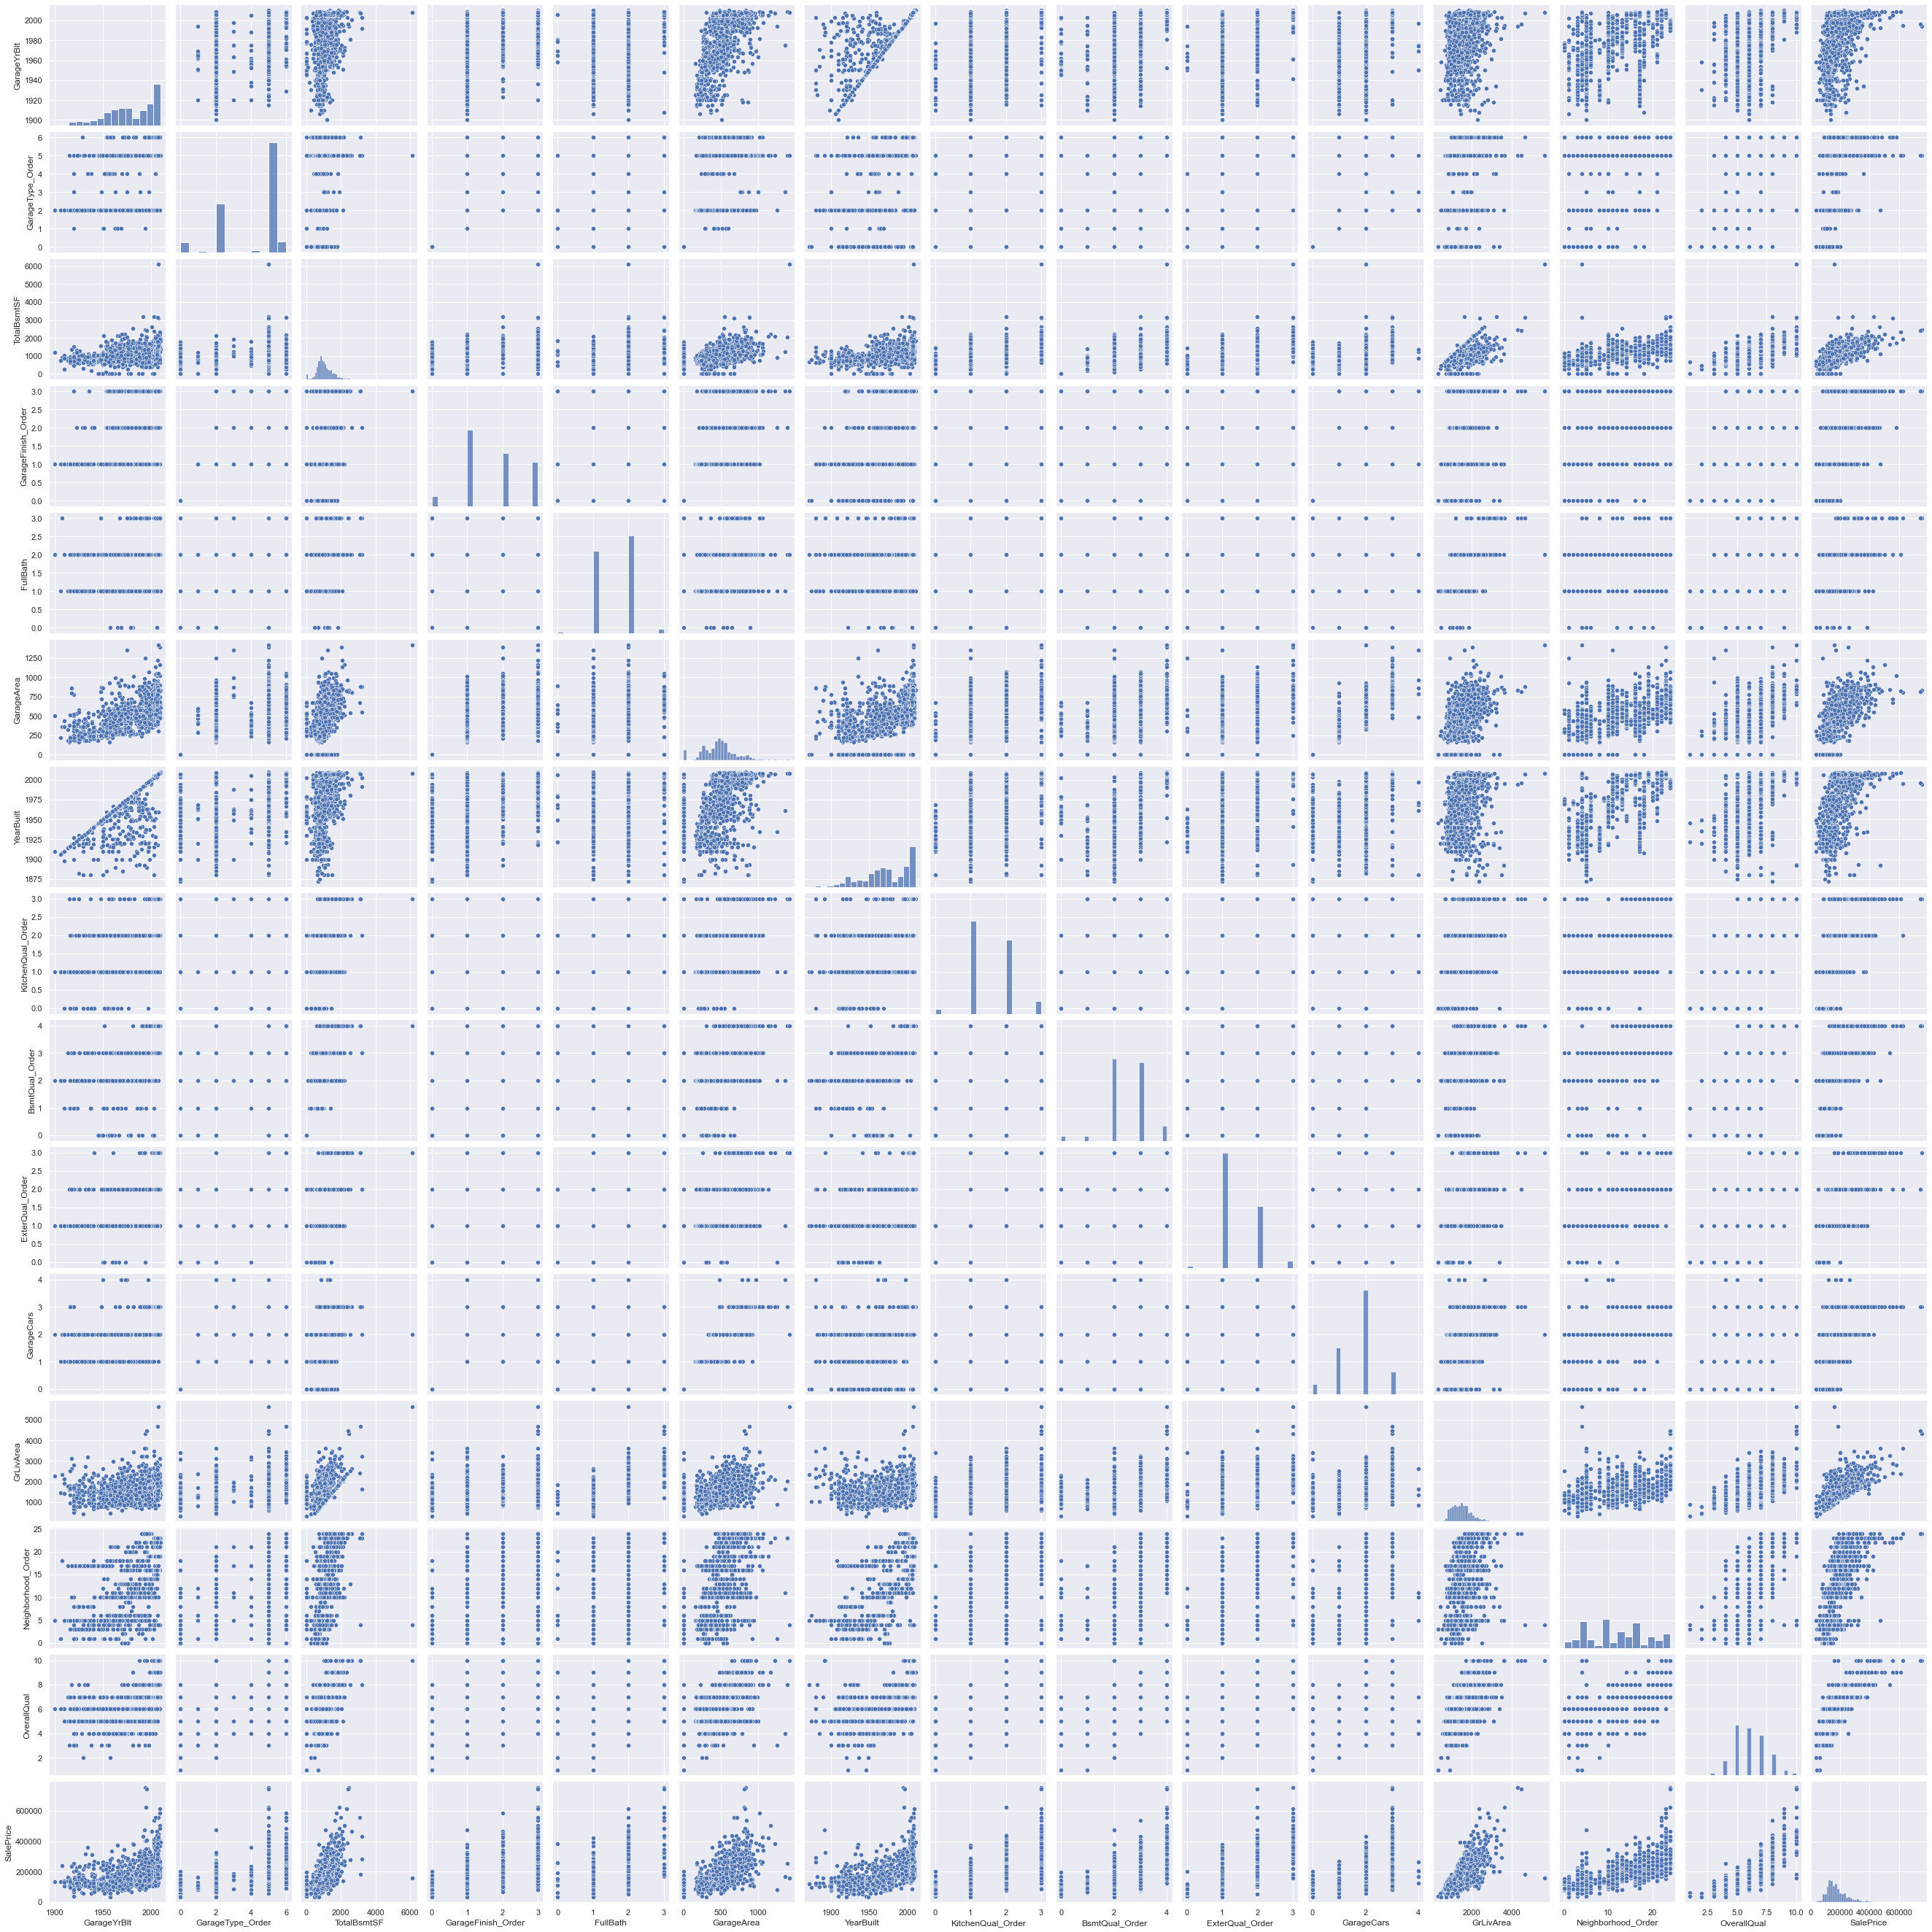

In [20]:
#scatterplot
sns.set()
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In the figure between 'TotalBsmtSF' and 'GrLiveArea', we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.

For the plot concerning 'SalePrice' and 'YearBuilt', we see what almost appears to be a shy exponential function. 

## Potential Featrues

I will try to focus on the following variables first:

Quantitative:
* GrLivArea (Above grade (ground) living area square feet)
* GarageArea (Size of garage in square feet)
* YearBuilt (Original construction date)
* TotalBsmtSF (Total square feet of basement area)

Qualitive:
* OverallQual (Rates the overall material and finish of the house)
* Neighborhood (Physical locations within Ames city limits)
* GarageFinish (Interior finish of the garage)

In [21]:
potential_features = ['OverallQual','GrLivArea','GarageArea','YearBuilt','TotalBsmtSF','Neighborhood']

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

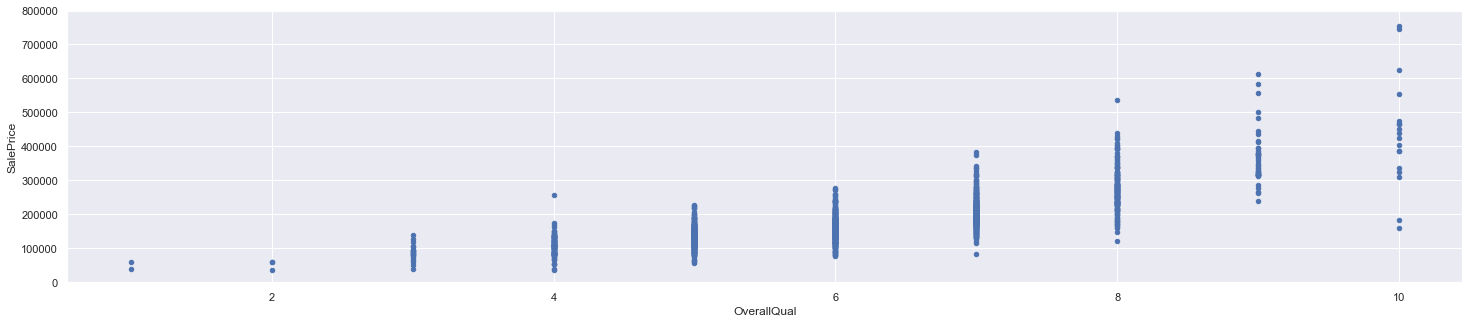

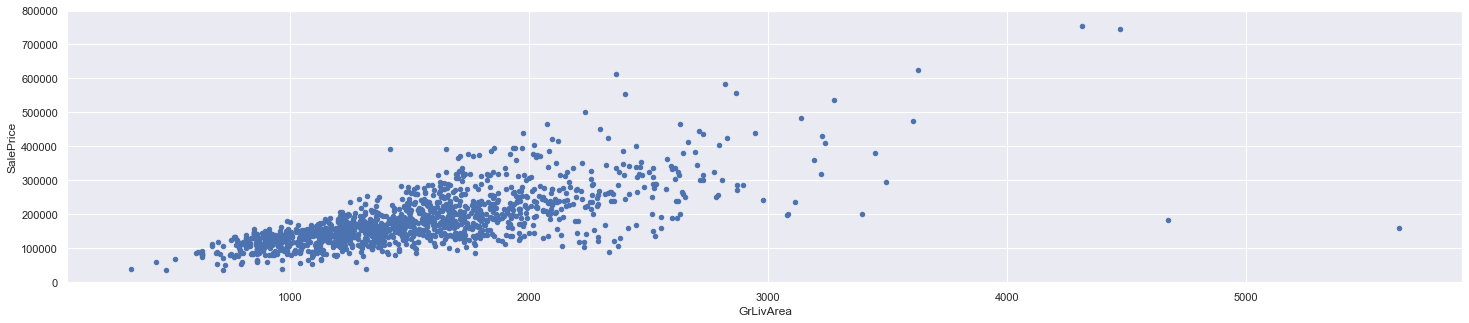

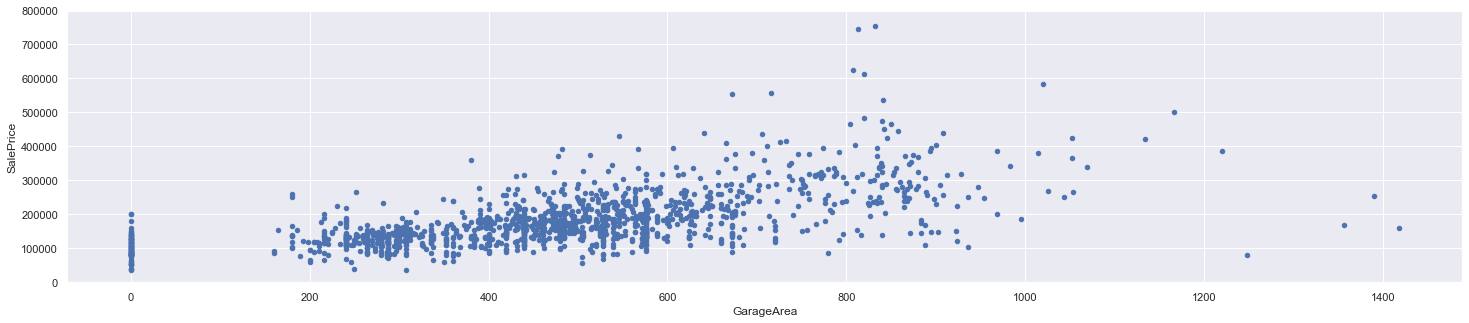

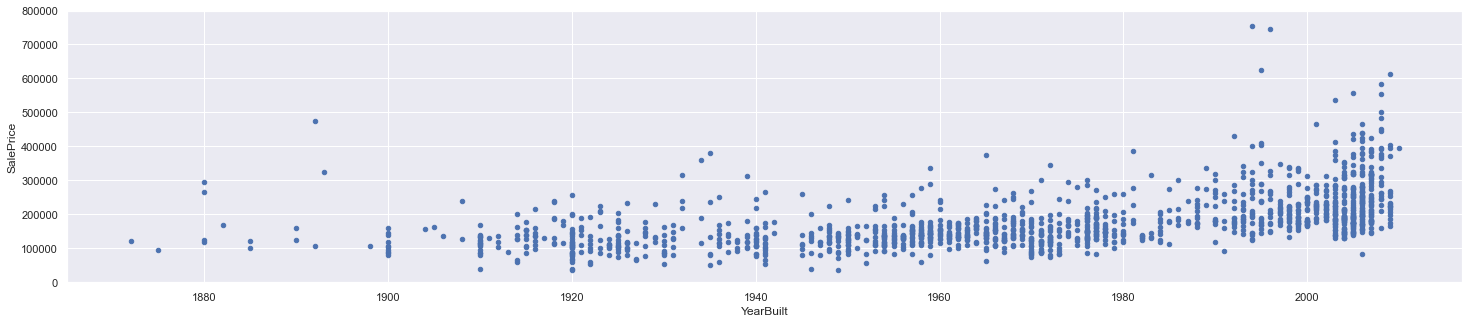

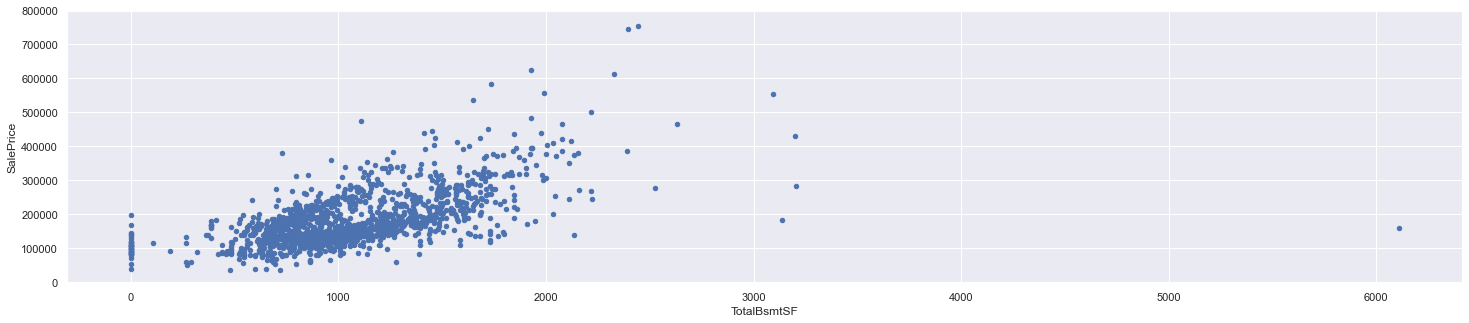

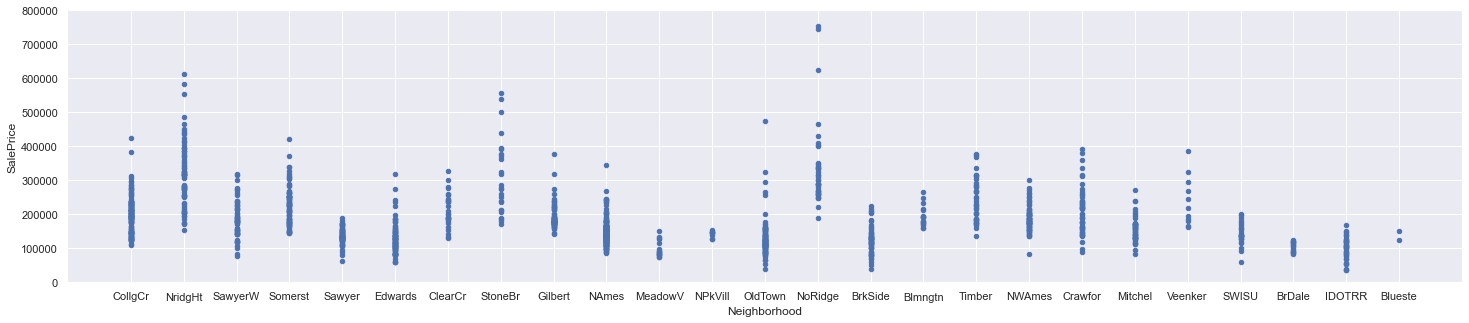

In [22]:
df_train.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000),figsize = (25,5))
df_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000),figsize = (25,5))
df_train.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000),figsize = (25,5))
df_train.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000),figsize = (25,5))
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000),figsize = (25,5))
df_train.plot.scatter(x='Neighborhood', y='SalePrice', ylim=(0,800000),figsize = (25,5))

linear relationship

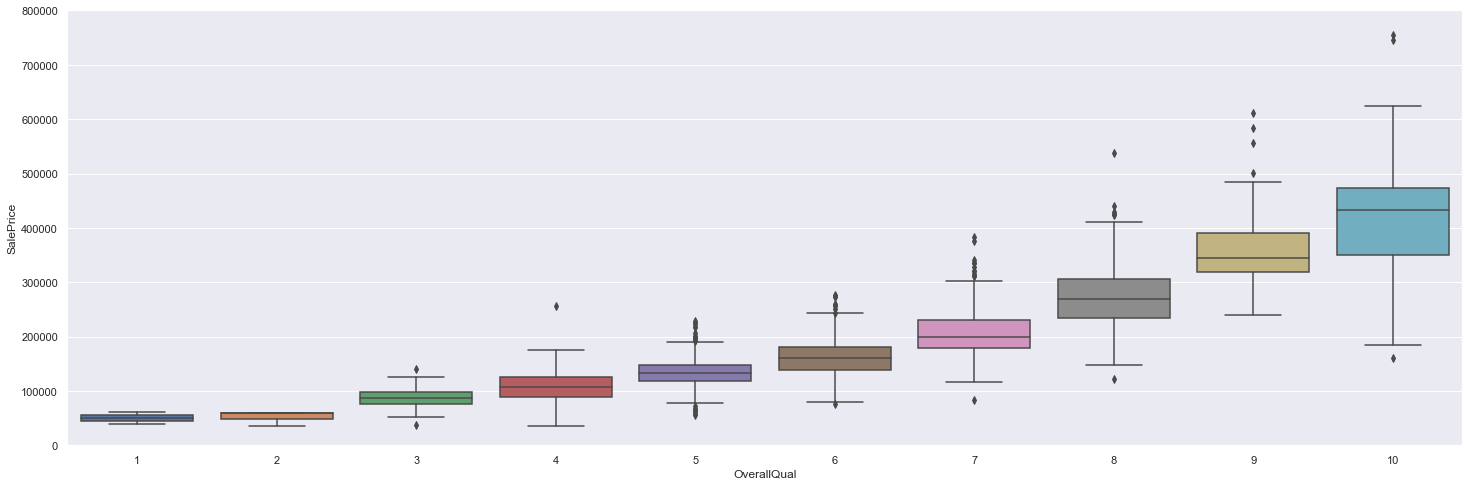

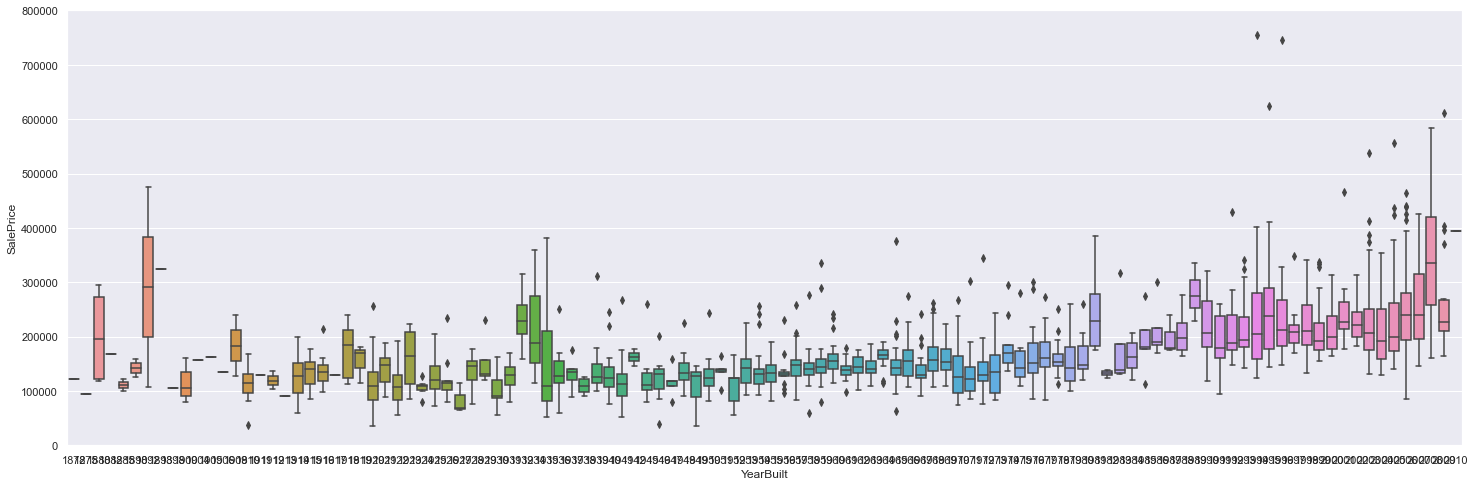

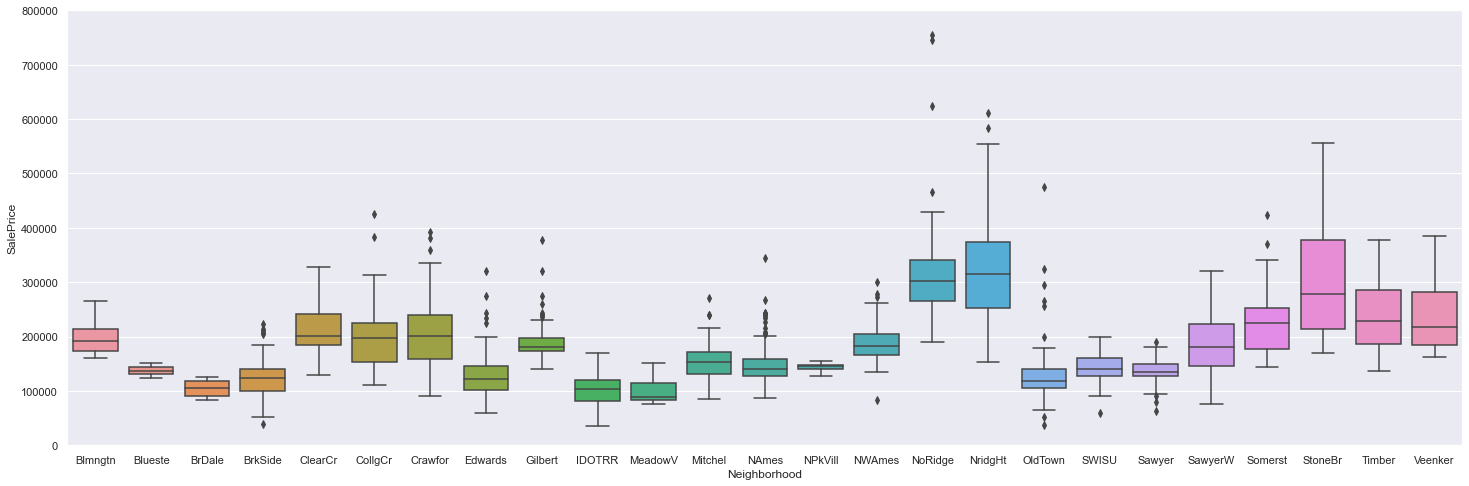

In [23]:
for feature in ['OverallQual','YearBuilt','Neighborhood']:
    f, ax = plt.subplots(figsize=(25, 8))
    fig = sns.boxplot(x=feature, y="SalePrice", data=df_train)
    fig.axis(ymin=0, ymax=800000)
    # plt.xticks(rotation=90)
    plt.show()

we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

# Data cleaning

## Missing Data

In [24]:
df_missing

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


When more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house. Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations. Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [25]:
#dealing with missing data
df_train = df_train.drop((df_missing[df_missing['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

## Outliers

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [26]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('outer range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

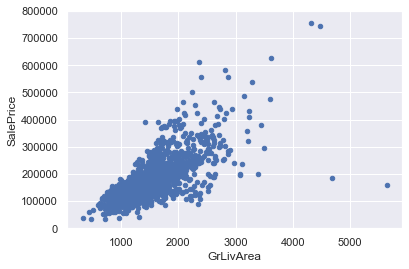

In [27]:
#bivariate analysis saleprice/grlivarea
df_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [28]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

# Test assumptions

## Normality
* <b>Normality</b> - The data should look like a normal distribution because several statistic tests rely  on this (e.g. t-statistics). I'll just check univariate normality for 'SalePrice'. Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have). Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

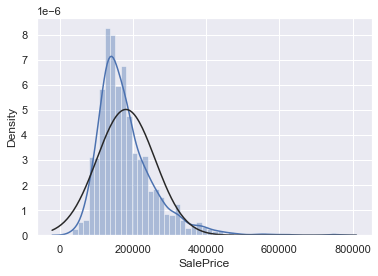

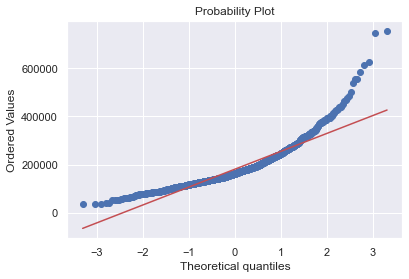

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. In case of positive skewness, log transformations usually works well.

In [30]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

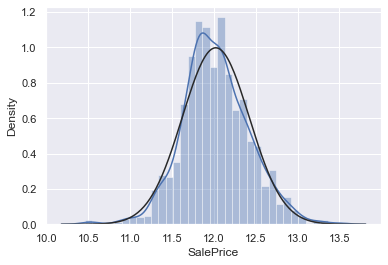

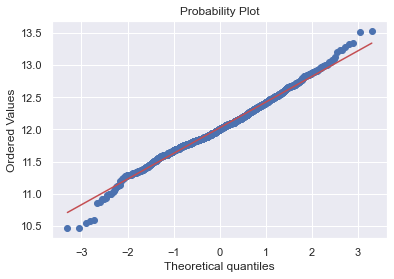

In [31]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

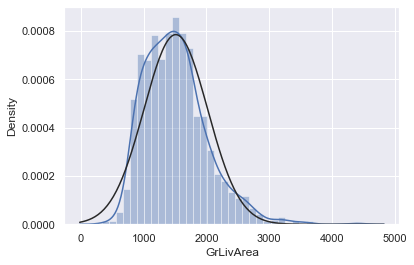

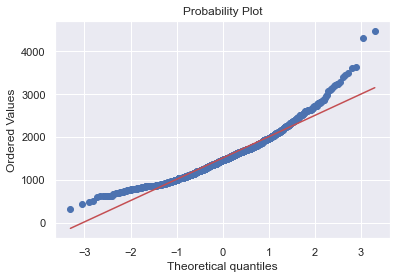

In [32]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [33]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

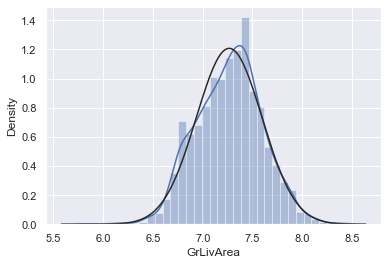

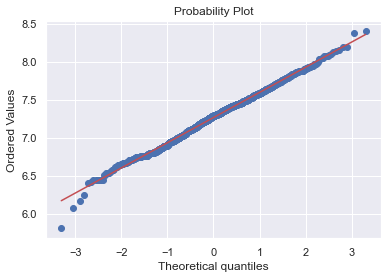

In [34]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

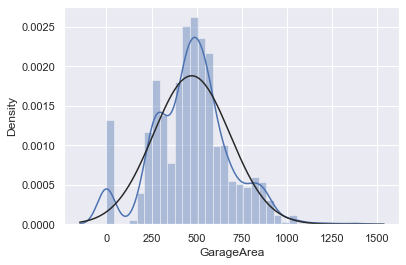

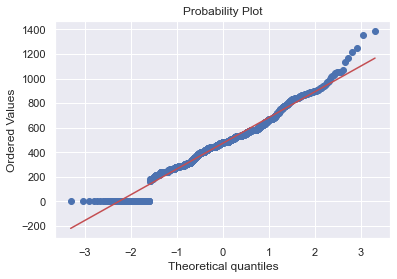

In [35]:
#histogram and normal probability plot
sns.distplot(df_train['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GarageArea'], plot=plt)

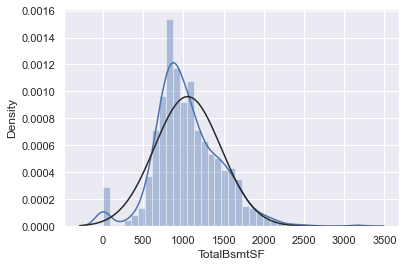

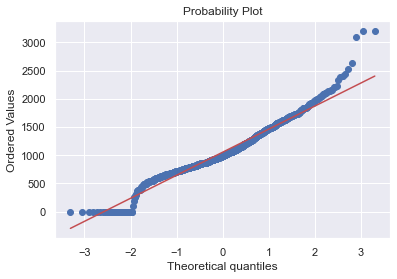

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

A significant number of observations with value zero (houses without basement/garage). A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.


In [37]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasGarage'] = pd.Series(len(df_train['GarageArea']), index=df_train.index)
df_train['HasGarage'] = 0 
df_train.loc[df_train['GarageArea']>0,'HasGarage'] = 1

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [38]:
#transform data
df_train.loc[df_train['HasGarage']==1,'GarageArea'] = np.log(df_train['GarageArea'])
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

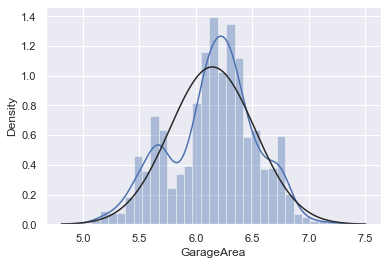

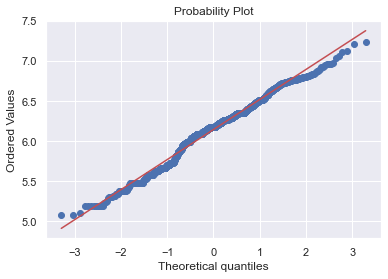

In [39]:
sns.distplot(df_train[df_train['GarageArea']>0]['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['GarageArea']>0]['GarageArea'], plot=plt)

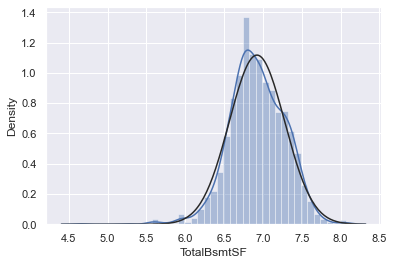

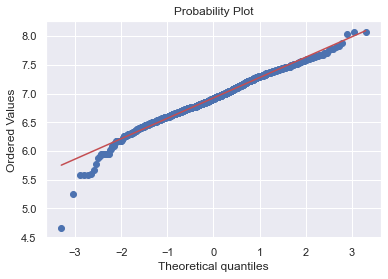

In [40]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Dummy Variables

In [45]:
#convert categorical variable into dummy
df_train_final = df_train[['OverallQual','GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'Neighborhood']].copy()
df_train_final = pd.get_dummies(df_train_final)
df_train_final

,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,7.444249,6.306275,2003,6.752270,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,7.477604,6.297109,2003,6.784457,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,7.360740,6.298949,2002,7.360740,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,7.336286,6.276643,2004,7.324490,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6,7.444249,6.226537,1993,6.723832,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8,7.365180,6.721426,2007,7.365180,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1456,6,6.887553,0.000000,1975,6.851185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,5,7.076654,0.000000,1910,6.489205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,4,7.049255,0.000000,1955,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train_final = df_train[['OverallQual','GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'Neighborhood_Order']].copy()
df_train_final

,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,Neighborhood_Order
0,7,7.444249,6.306275,2003,6.752270,16
1,7,7.477604,6.297109,2003,6.784457,16
2,7,7.360740,6.298949,2002,7.360740,16
3,7,7.336286,6.276643,2004,7.324490,23
4,6,7.444249,6.226537,1993,6.723832,12
...,...,...,...,...,...,...
1455,8,7.365180,6.721426,2007,7.365180,19
1456,6,6.887553,0.000000,1975,6.851185,4
1457,5,7.076654,0.000000,1910,6.489205,4
1458,4,7.049255,0.000000,1955,0.000000,4
